# Car Price Prediction Project

## 1. Import Libraries

In [1]:

import os
import pathlib
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import joblib

warnings.filterwarnings("ignore")


## 2. Load Dataset

In [3]:
import pandas as pd

# Define file paths
csv_path = r"C:\Users\bbuser\Desktop\Jupyter\CarPrice_Assignment.csv"
excel_path = r"C:\Users\bbuser\Desktop\Jupyter\Data Dictionary - carprices.xlsx"

# Load the CSV file
df_raw = pd.read_csv(csv_path)
print("CSV Shape:", df_raw.shape)
print("CSV Preview:")
display(df_raw.head())

CSV Shape: (205, 26)
CSV Preview:


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
# Load the Excel file (data dictionary)
df_dict = pd.read_excel(excel_path)
print("\nData Dictionary Shape:", df_dict.shape)
print("Data Dictionary Preview:")
display(df_dict.head())


Data Dictionary Shape: (31, 14)
Data Dictionary Preview:


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,DATA DICTONARY,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,1,Car_ID,NaN,NaN,NaN,Unique id of each observation (Interger),NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,2,Symboling,NaN,NaN,NaN,"Its assigned insurance risk rating, A value of...",NaN,NaN


## 3. Data Cleaning & Preprocessing

In [19]:

df = df_raw.copy()
df.columns = [c.strip().lower().replace(' ', '_') for c in df.columns]

# Rename target column
if 'selling_price' in df.columns:
    df.rename(columns={'selling_price': 'price'}, inplace=True)

target_col = 'price'

# Handle missing values
num_cols = [c for c in df.columns if pd.api.types.is_numeric_dtype(df[c]) and c != target_col]
cat_cols = [c for c in df.columns if c not in num_cols and c != target_col]

for c in num_cols:
    df[c] = df[c].fillna(df[c].median())

for c in cat_cols:
    df[c] = df[c].fillna(df[c].mode().iloc[0])

print("Missing values after cleaning:", df.isna().sum().sum())
df.head()


Missing values after cleaning: 0


,car_id,symboling,carname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## 4. Exploratory Data Analysis

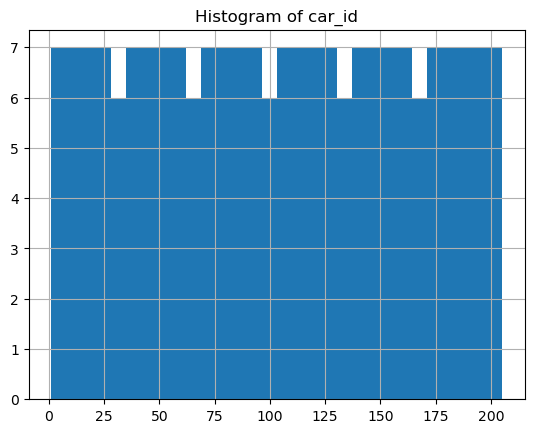

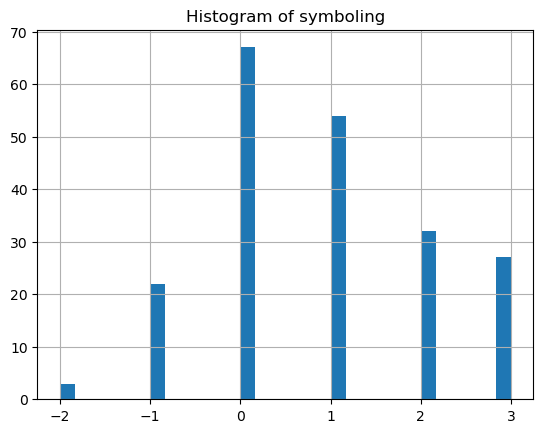

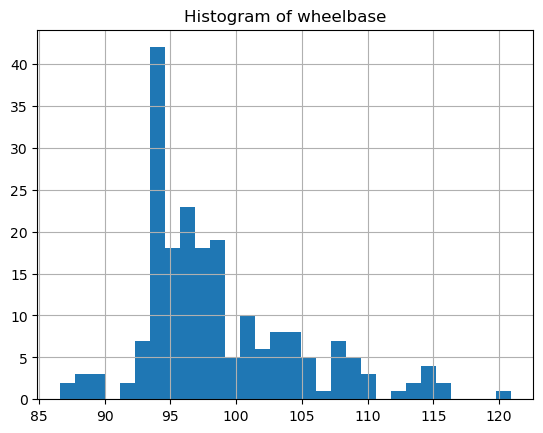

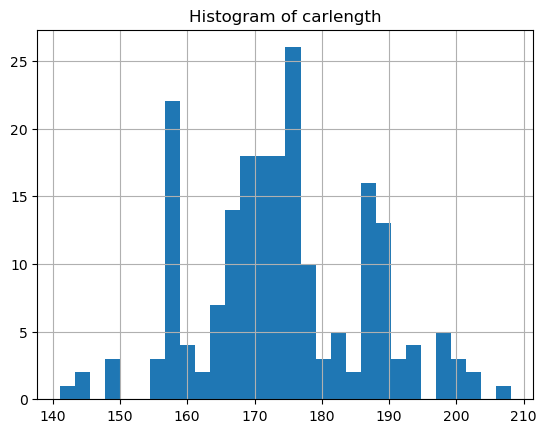

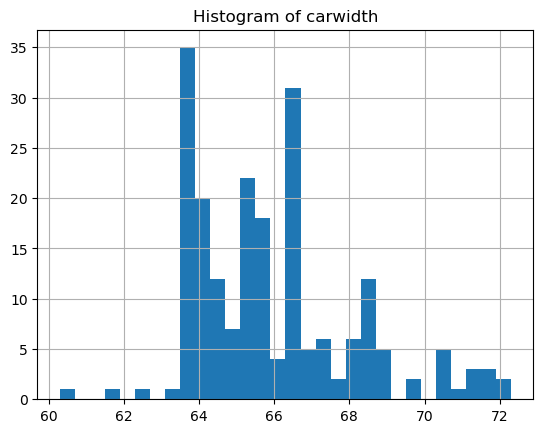

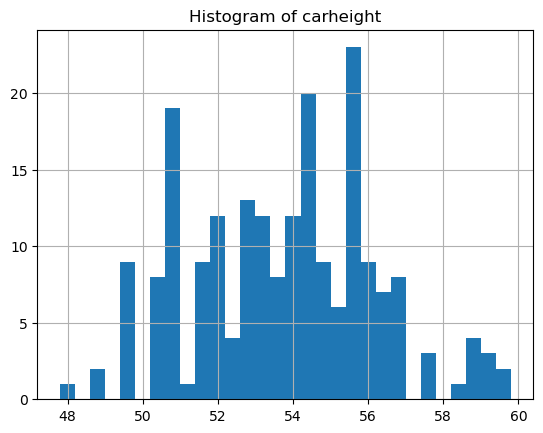

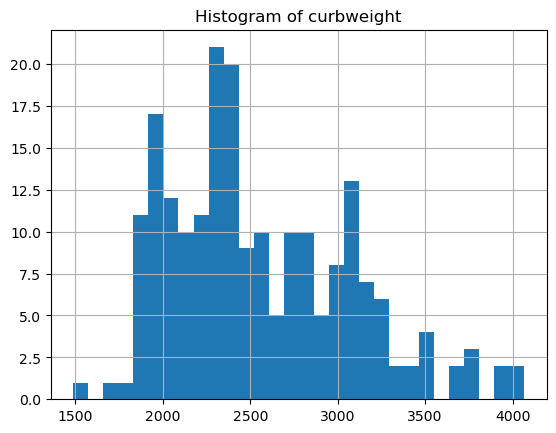

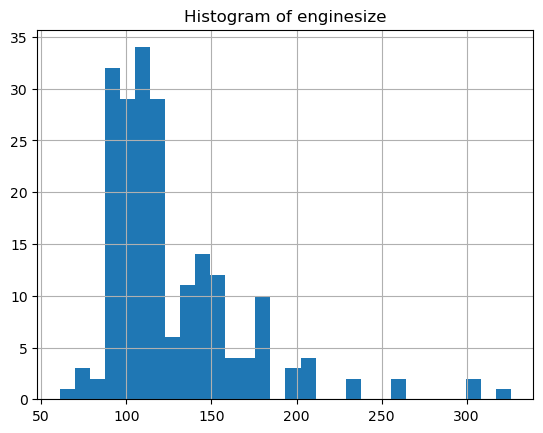

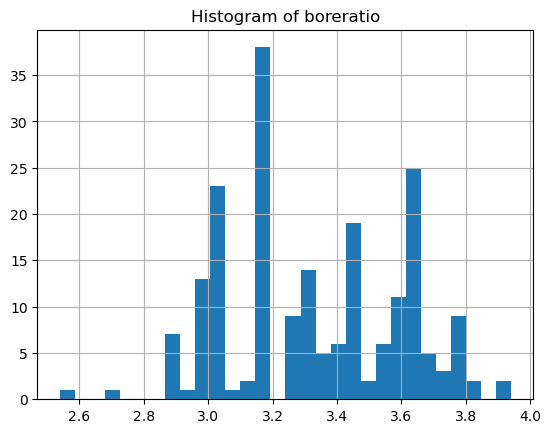

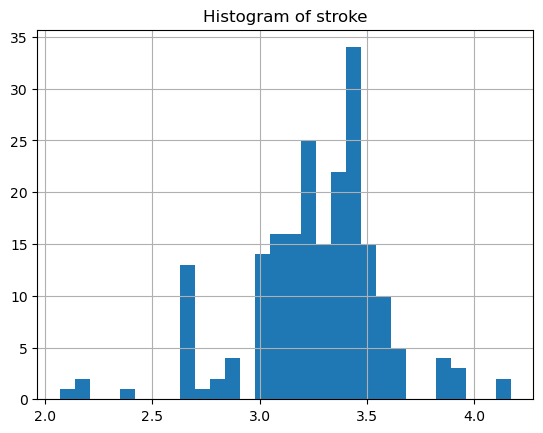

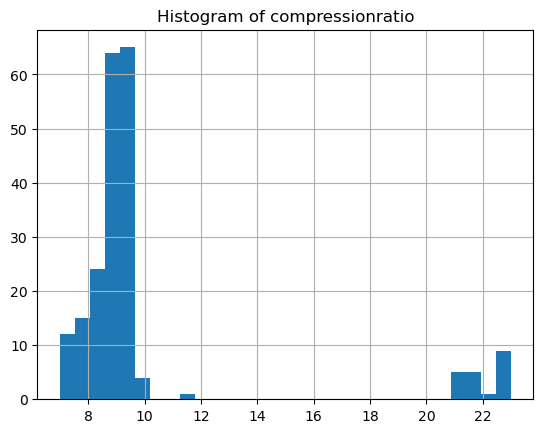

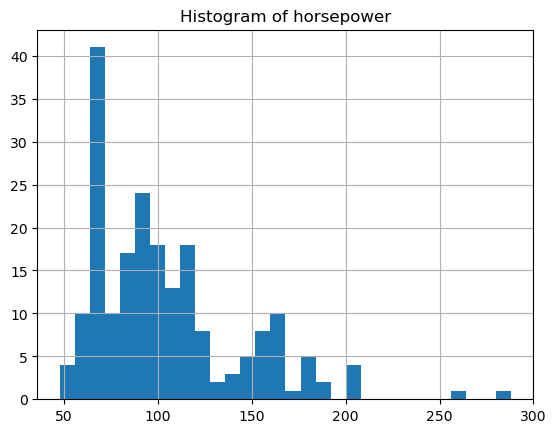

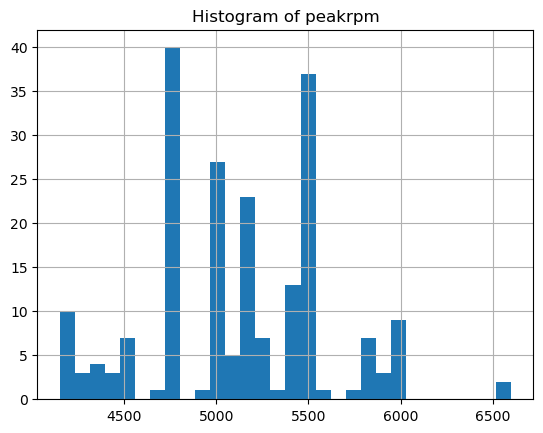

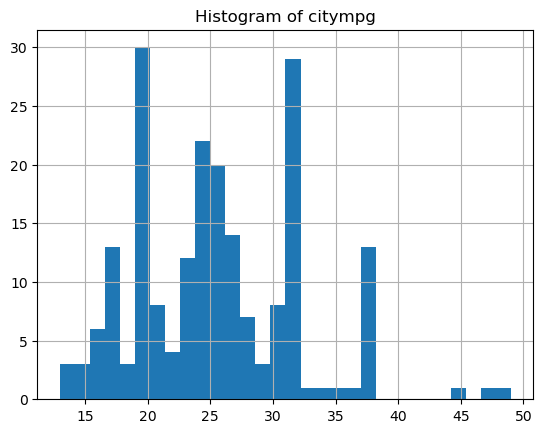

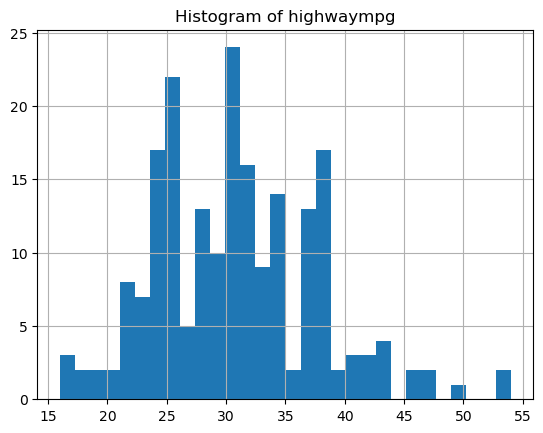

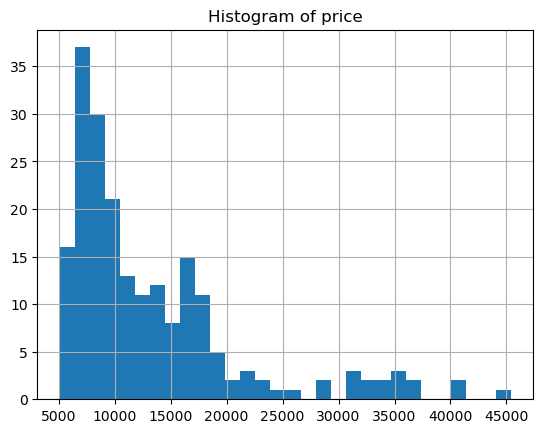

In [20]:
# Histograms for numeric columns
for col in num_cols + [target_col]:
    plt.figure()
    df[col].hist(bins=30)
    plt.title(f"Histogram of {col}")
    plt.show()


In [12]:
# Check the columns in your DataFrame
print(df.columns)

# Set the target column
target_col = 'price'  # or 'price' depending on exact capitalization


Index(['car_id', 'symboling', 'carname', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


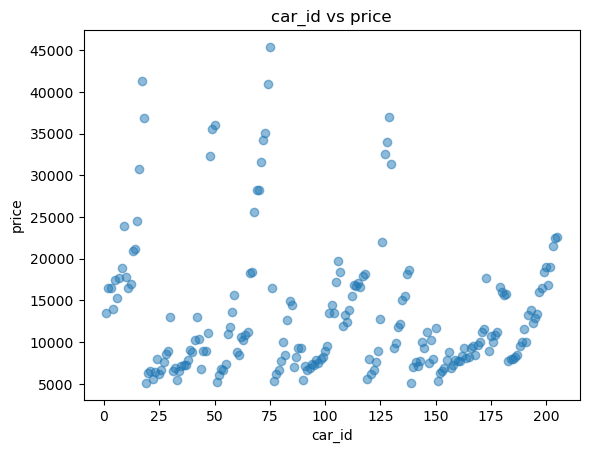

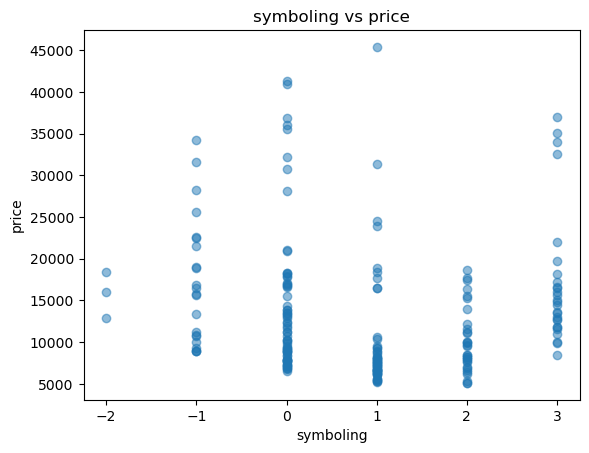

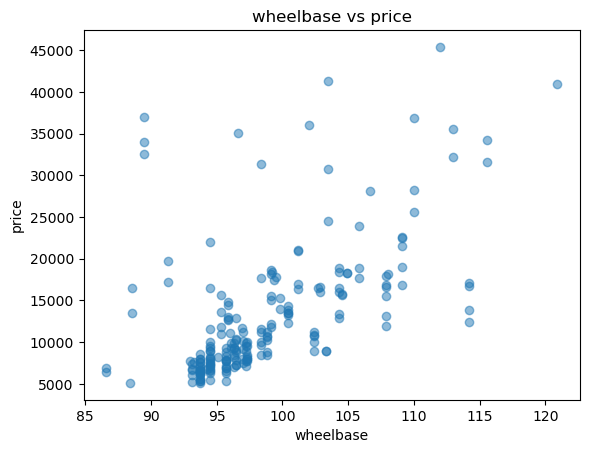

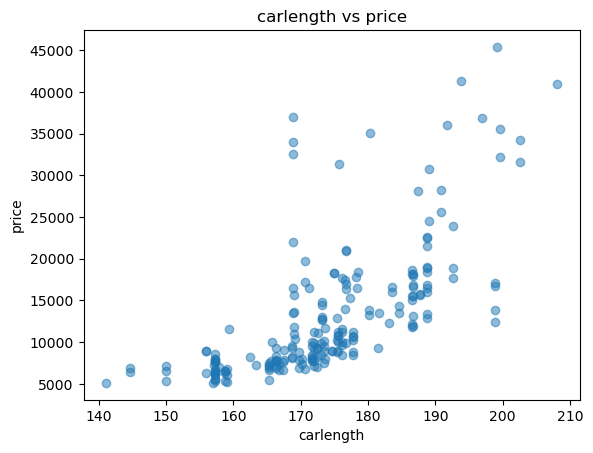

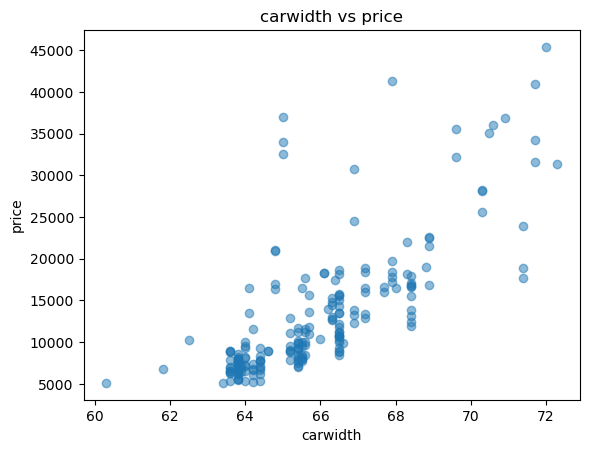

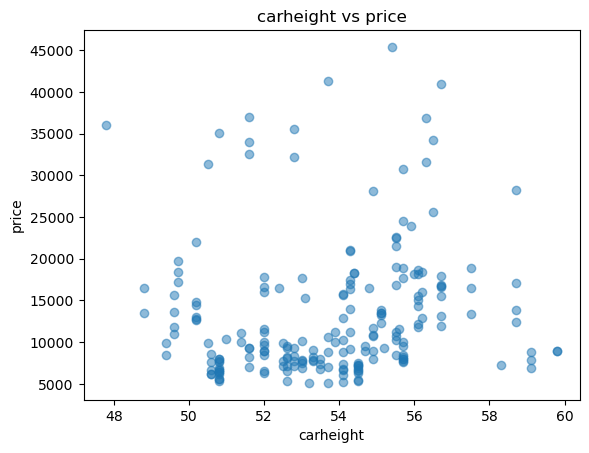

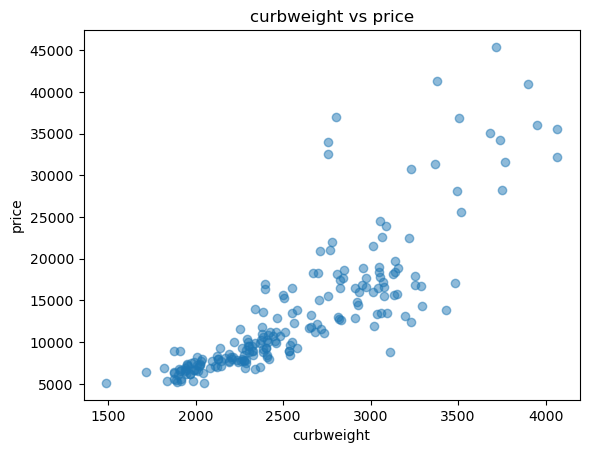

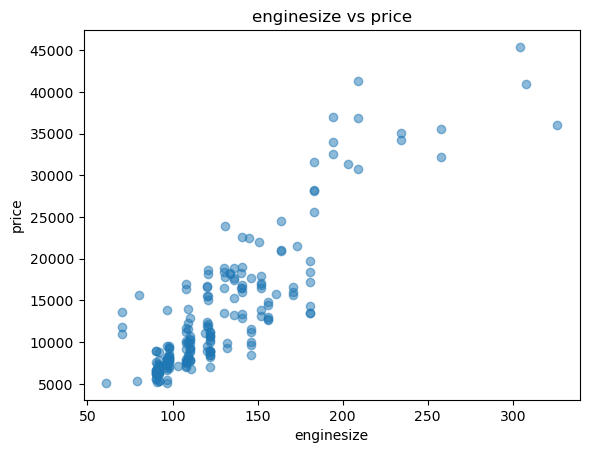

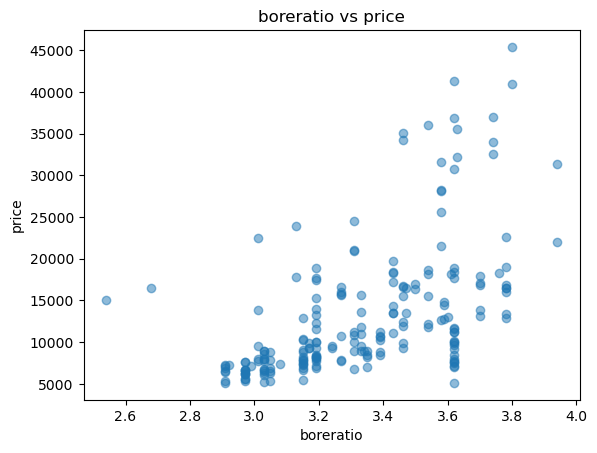

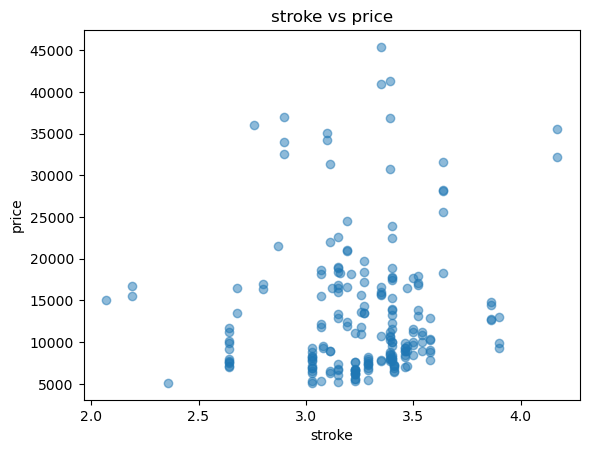

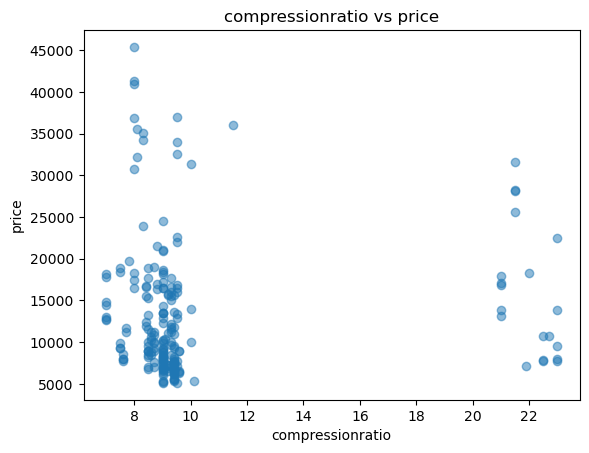

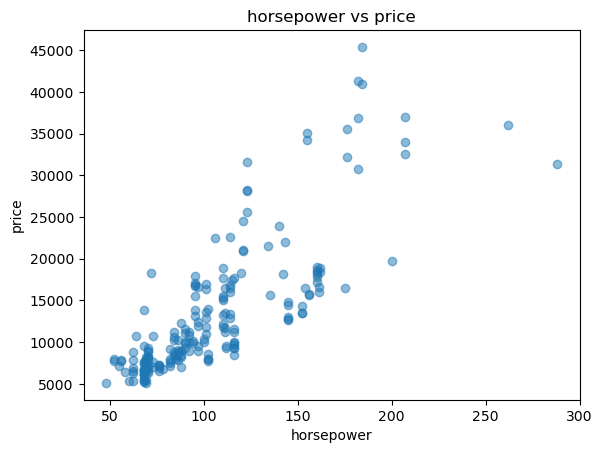

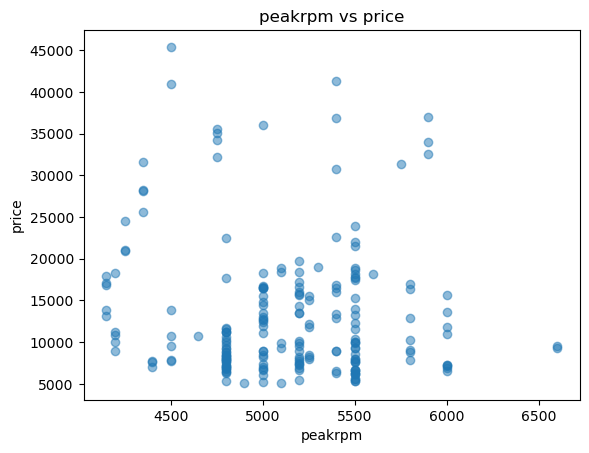

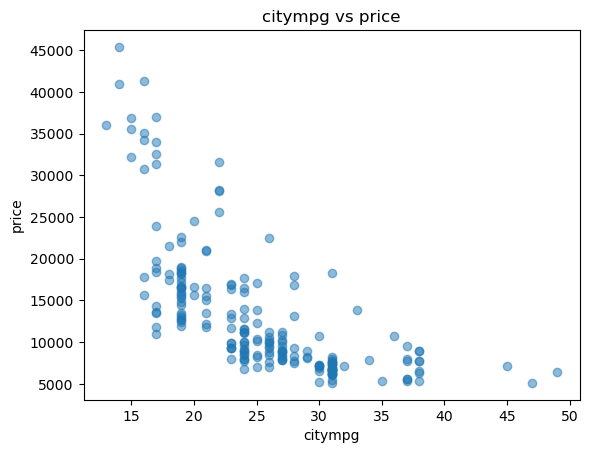

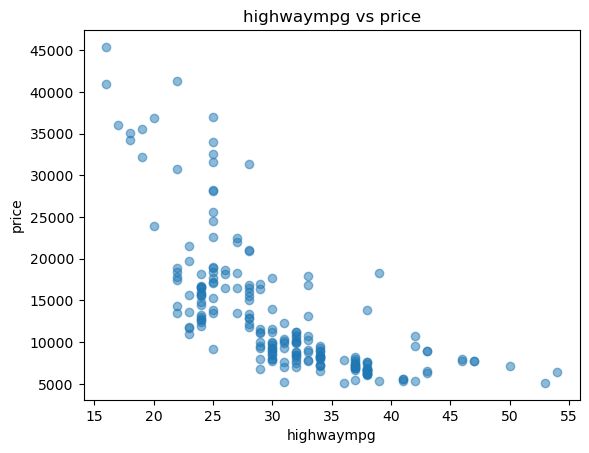

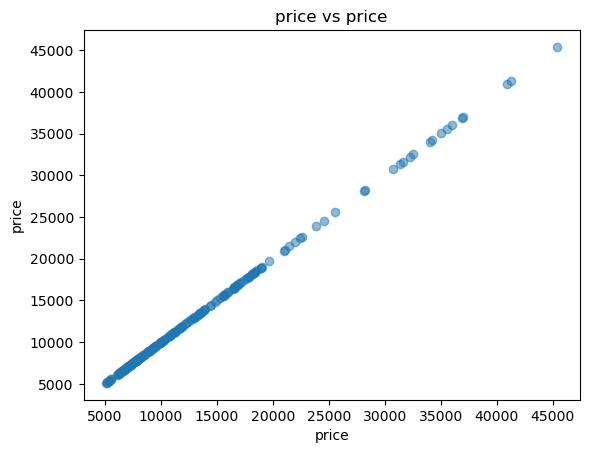

In [13]:
# Scatter plots vs target
for col in num_cols:
    plt.figure()
    plt.scatter(df[col], df[target_col], alpha=0.5)
    plt.title(f"{col} vs {target_col}")
    plt.xlabel(col)
    plt.ylabel(target_col)
    plt.show()


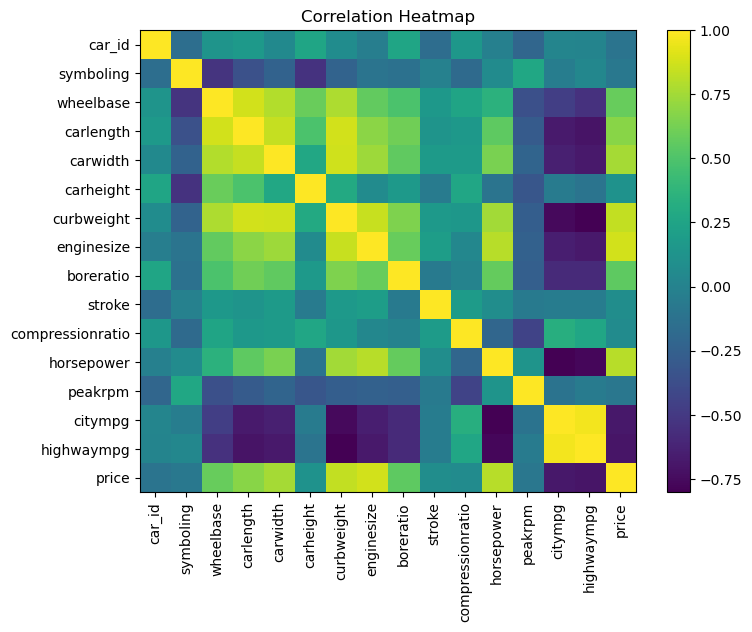

In [8]:
# Correlation heatmap
corr_cols = [c for c in df.columns if pd.api.types.is_numeric_dtype(df[c])]
corr = df[corr_cols].corr()

plt.figure(figsize=(8,6))
plt.imshow(corr, cmap='viridis', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr_cols)), corr_cols, rotation=90)
plt.yticks(range(len(corr_cols)), corr_cols)
plt.title("Correlation Heatmap")
plt.show()


## 5. Feature Engineering

In [9]:

# Create Car Age
if 'year' in df.columns:
    ref_year = int(df['year'].max())
    df['car_age'] = ref_year - df['year']

# Log transform skewed features
for col in ['kms_driven', 'present_price', target_col]:
    if col in df.columns:
        df[f'log_{col}'] = np.log1p(df[col])

df.head()


,car_id,symboling,carname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## 6. Encoding & Train-Test Split

In [14]:

X = df.drop(columns=[target_col])
y = df[target_col]

X_enc = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X_enc, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


((164, 190), (41, 190))

## 7. Modeling

In [15]:

models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=10.0, random_state=42),
    "Lasso": Lasso(alpha=0.001, random_state=42, max_iter=10000),
    "RandomForest": RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1),
}

results = []
fitted_models = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    results.append({"Model": name, "RMSE": rmse, "R2": r2})
    fitted_models[name] = model

results_df = pd.DataFrame(results).sort_values(by="RMSE")
results_df


,Model,RMSE,R2
3,RandomForest,1876.125399,0.955413
1,Ridge,3119.560656,0.876727
2,Lasso,13164.387687,-1.195240
0,LinearRegression,13295.115526,-1.239056


## 8. Model Performance Visualization

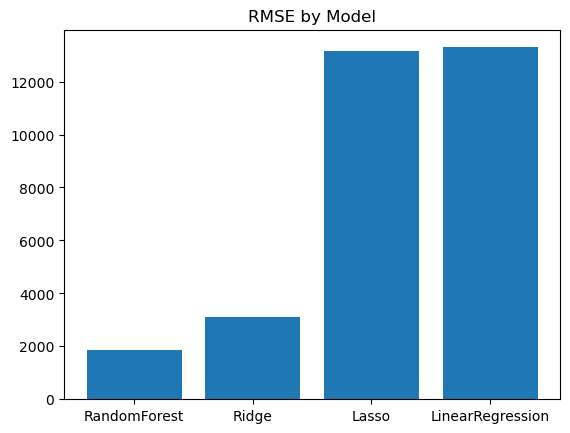

In [16]:
plt.figure()
plt.bar(results_df['Model'], results_df['RMSE'])
plt.title("RMSE by Model")
plt.show()

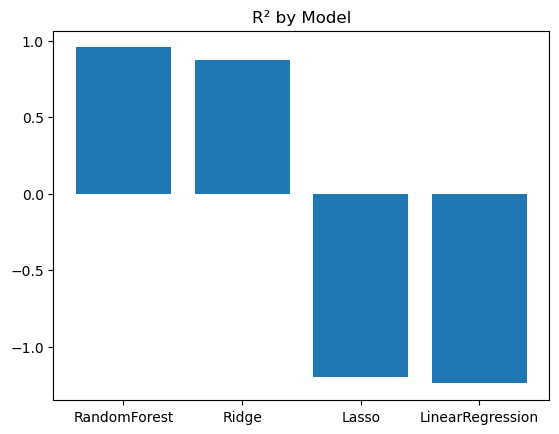

In [17]:
plt.figure()
plt.bar(results_df['Model'], results_df['R2'])
plt.title("R² by Model")
plt.show()

## 9. Save Best Model

In [18]:

best_model_name = results_df.iloc[0]['Model']
best_model = fitted_models[best_model_name]

joblib.dump(best_model, f"best_model_{best_model_name}.joblib")
print("Saved best model:", best_model_name)


Saved best model: RandomForest
